In [19]:
# Purpose: What do villians talk about in Dungeons and Dragons?
# Source: https://www.reddit.com/r/DnD/comments/3ebo80/what_was_the_best_villain_monologue_your_dm_ever/
# Notes: Converted to text files for ease of practice
# Date: 05/30/2018 
# Created By: Katelyn Stenger

import nltk
import gensim

In [20]:
V1 = open("Villian1.txt", "r")
V2 = open("Villian2.txt", "r")
V3 = open("Villian3.txt", "r")
V4 = open("Villian4.txt", "r")

# Challenge: Use regex to systematically upload all and save in set
# Initial thought: ["Villian/d].txt

all_docs = [V1, V2, V3, V4]

# read in all of the documents and put them together
corpus = []
for doc in all_docs:
    corpus.append(doc.read())
    
print(corpus)

["I offered you wealth, property, money. All the simple things of a corporate role and more. I offered you magic. Secrets. Revenge. A place by the river, the lights on the water at night. I invited you to share the dreams of a child, to sense the skin of another's sex, to hear all with the ears of a bat, to see with the eyes of a hawk, to smell with the nose of a hound. I could have given you thoughts in an unimaginable brilliant colour, or dabbling in the visions of an addict on the edge of death and seeing what he sees as he passes beyond, a glimpse of something more. We could have put you on the same eyeline as God Himself. I offered you visions, wonders, comfort, security. Whatever you desired. But you refused me. So then I offer you this alternative. Run, hide children because I've seen your faces and I can recognize you now; wherever you go, whatever you do, my men will follow you, track you by the prints from your fingers from the sound of your footsteps, and we will find you. A

In [21]:
from gensim.utils import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# set of all of stop words
stop_words = set(stopwords.words('english'))
# set of punctuation 
punctuation = set(string.punctuation)

# stemmer object
stemmer = PorterStemmer()

def clean(doc):
    # Remove stop words
    stop_free = ' '.join([term for term in doc.lower().split() if term not in stop_words])
    
    # Remove punctuation
    punc_free = ''.join(term for term in stop_free if term not in punctuation)
    
    # Stem each word
    stemmed = ' '.join(stemmer.stem(word) for word in punc_free.split())
    
    return stemmed

# clean every document in the corpus
clean_corpus = [clean(doc).split() for doc in corpus]
print(len(clean_corpus[1]))


# TEST: Effect  of Tokenizing by word without punctuation
from nltk.tokenize import RegexpTokenizer
corpus_test = corpus
tokenizer = RegexpTokenizer(r'\w+')

# NLTK
stop_words = set(stopwords.words('english'))
print(len(tokenizer))

# FILTER OUT STOP WORDS
filtered_sentence = []
for w in words:
    if w not in stop_words:
        filtered_sentence.append(w)

#STEMMED
villian_stemmed = stemmer.stem(w)


56


In [22]:
all_words = []
for doc in clean_corpus:
    all_words += doc

# define "word_frequencies" as the frequencies of all of the words in "all_words"
word_frequencies = nltk.FreqDist(all_words)
# print the 20 most common words
print(word_frequencies.most_common(20))


# put it in a data frame
import pandas as pd

# Make data frame from dictionary
term_df = pd.DataFrame({'count':list(word_frequencies.values())}, index = word_frequencies.keys())
# sort the values so that the terms with the highest counts are at the top
term_df.sort_values('count', ascending = False, inplace = True)
term_df.head()

[('offer', 6), ('see', 6), ('play', 6), ('peopl', 5), ('me', 4), ('world', 4), ('could', 3), ('face', 3), ('you', 3), ('pain', 3), ('know', 3), ('final', 3), ('dark', 3), ('more', 2), ('place', 2), ('anoth', 2), ('eye', 2), ('vision', 2), ('death', 2), ('someth', 2)]


,count
offer,6
play,6
see,6
peopl,5
world,4


In [23]:
# get a part of speech pair for each term in the index of term_df
tagged = nltk.pos_tag(term_df.index)

print(tagged[0:20]) # print the first 20

# Put the words and parts of speech in a dataframe
terms = []
tags = []
for pair in tagged:
    terms.append(pair[0])
    tags.append(pair[1])

pos_df = pd.DataFrame({'POS': tags}, index = terms)
pos_df.head()

[('offer', 'NN'), ('play', 'NN'), ('see', 'VBP'), ('peopl', 'JJ'), ('world', 'NN'), ('me', 'PRP'), ('you', 'PRP'), ('face', 'VBP'), ('pain', 'VB'), ('could', 'MD'), ('know', 'VB'), ('final', 'JJ'), ('dark', 'NN'), ('whatev', 'NN'), ('children', 'NNS'), ('fall', 'VBP'), ('himself', 'PRP'), ('someth', 'JJ'), ('ive', 'JJ'), ('death', 'NN')]


,POS
offer,NN
play,NN
see,VBP
peopl,JJ
world,NN


In [24]:
# combine the dataframes
df = pd.concat([term_df, pos_df], axis = 1)
df.head()

,count,POS
offer,6,NN
play,6,NN
see,6,VBP
peopl,5,JJ
world,4,NN


In [25]:
from afinn import Afinn

# make an afinn object
afinn = Afinn()

# get sentiment for each document in the corpus 
# (unclean corpus because the clean one has some words the algorithm won't recognize)
titles = ['Villian1', 'Villian2', 'Villian3', 'Villian4']
for i in range(len(corpus)):
    print(titles[i] + ' sentiment score:', afinn.score(corpus[i]))

Villian1 sentiment score: 0.0
Villian2 sentiment score: -15.0
Villian3 sentiment score: -11.0
Villian4 sentiment score: 1.0


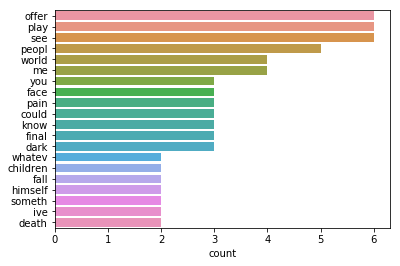

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

top20 = df.iloc[:20]
sns.barplot(x = top20['count'], y = top20.index)
plt.show()

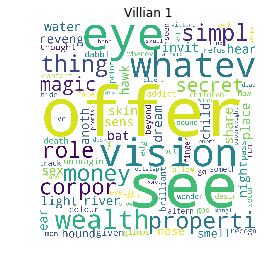

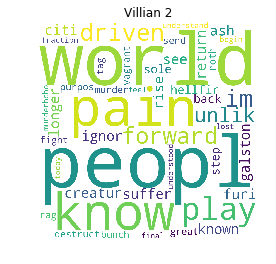

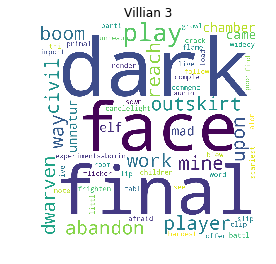

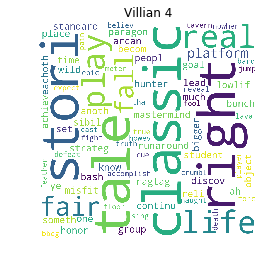

In [27]:
# make a word cloud
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# make a word cloud for each document in the corpus
titles = ['Villian 1', 'Villian 2', 'Villian 3', 'Villian 4']
# Challenge: Automate title process
for i in range(len(clean_corpus)):
    # generate a wordcloud object
    wordcloud = WordCloud(width = 1000, height = 1000, background_color='white').generate(' '.join(clean_corpus[i]))
    plt.imshow(wordcloud)
    plt.title(titles[i])
    plt.axis("off")
    plt.show()

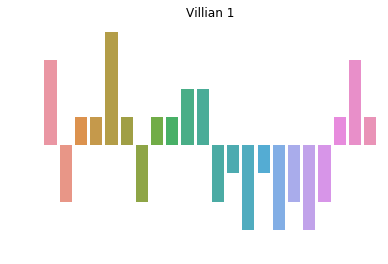

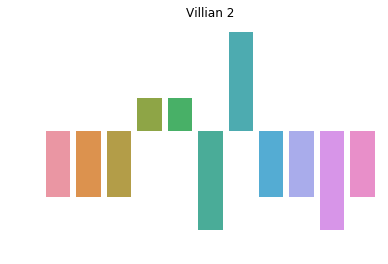

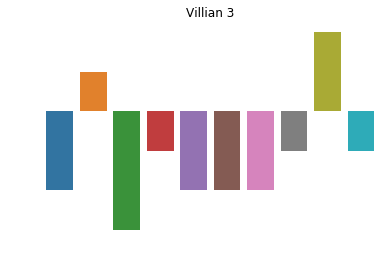

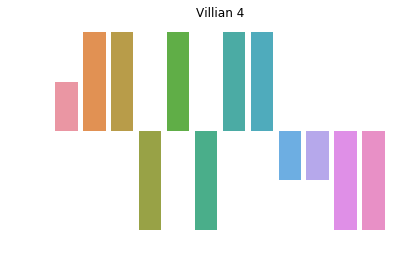

In [28]:
def clean_wo_stem(doc):
    # Remove stop words
    stop_free = ' '.join([term for term in doc.lower().split() if term not in stop_words])
    
    # Remove punctuation
    punc_free = ''.join(term for term in stop_free if term not in punctuation)
    
    return punc_free

clean_wo_stem_corpus = [clean_wo_stem(doc).split() for doc in corpus]

for i in range(len(clean_wo_stem_corpus)):
    temp = pd.DataFrame({'scores':afinn.scores_with_pattern(' '.join(clean_wo_stem_corpus[i]))})
    sns.barplot(x = temp.index, y = temp['scores'])
    plt.title(titles[i])
    plt.axis('off')
    plt.show()
#     print(afinn.scores_with_pattern(' '.join(doc)))

In [29]:
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(clean_corpus)
#print(dictionary.token2id)

In [30]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
dtm = [dictionary.doc2bow(doc) for doc in clean_corpus]
print(dtm)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 5), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 4), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 1), (104, 3), (105, 1)], [(50, 1), (77, 1), (106, 1), (107, 1), (108, 1)

In [31]:
from gensim.models.ldamodel import LdaModel

# Creating the object for LDA model using gensim library
Lda = LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(dtm, num_topics=20, id2word = dictionary, passes=100)

# print out the topics
for topic in ldamodel.show_topics(num_topics = -1, num_words = 5):
    print(topic, '\n')

(0, '0.004*"offer" + 0.004*"see" + 0.004*"parti" + 0.004*"poor" + 0.004*"player"') 

(1, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(2, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(3, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(4, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(5, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(6, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(7, '0.004*"right" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"parti"') 

(8, '0.004*"parti" + 0.004*"player" + 0.004*"outskirt" + 0.004*"not" + 0.004*"poor"') 

(9, '0.004*"offer" + 0.004*"whatev" + 0.004*"eye" + 0.004*"face" + 0.004*"dark"') 

(10, '0.038*"offer" + 0.030*"see" + 0.023*"you" + 0.015*"could" + 0.015*"whatev"') 

(11, '0.004*"parti" + 0.004*"player" + 0.